<a href="https://colab.research.google.com/github/merinrose4007/DSA-class-activity/blob/main/Pandas_Casestudy_Merin_Rose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#1) Import pandas, numpy

import pandas as pd
import numpy as np

In [99]:
#2) Load dataset using pd.read_csv()
url='https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/IMDB-Movie-Data.csv'
data=pd.read_csv(url)

In [100]:
#3) Display: shape, head, column names, datatypes, missing value

print("Shape\n", data.shape)
print("\nHead\n", data.head())
print("\nColumns\n", data.columns)
print("\nDataTypes\n", data.info())
print('\nNull Values\n', data.isna())
print('\nNull Values\n', data.isna().sum())

Shape
 (1000, 12)

Head
    Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...

In [101]:
#4) Check and remove duplicates
data[data.duplicated()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


In [102]:
#5) Rename columns ("Title" > "Movie_Title")
data=data.rename(columns={'Title':'Movie_Title'})
print(data)

     Rank              Movie_Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of mankind, a te...          Ridley 

In [103]:
#6) Get unique genres
data['Genre'].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Mystery,Sci-Fi',
       'Horror,Thriller', 'Animation,Comedy,Family',
       'Action,Adventure,Fantasy', 'Comedy,Drama,Music', 'Comedy',
       'Action,Adventure,Biography', 'Adventure,Drama,Romance',
       'Adventure,Family,Fantasy', 'Biography,Drama,History',
       'Animation,Adventure,Comedy', 'Action,Comedy,Drama',
       'Action,Thriller', 'Biography,Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Drama,Thriller', 'Drama', 'Crime,Drama,Horror',
       'Action,Adventure,Drama', 'Drama,Thriller',
       'Action,Adventure,Comedy', 'Action,Horror,Sci-Fi',
       'Adventure,Drama,Sci-Fi', 'Action,Adventure,Western',
       'Comedy,Drama', 'Horror', 'Adventure,Drama,Fantasy',
       'Action,Crime,Thriller', 'Action,Crime,Drama',
       'Adventure,Drama,History', 'Crime,Horror,Thriller',
       'Drama,Romance', 'Comedy,Drama,Romance', 'Horror,Mystery,Thriller',
       'Crime,Drama,Mystery', 'Drama,Romance,Thriller',
       'Drama,History,T

In [104]:
#7) Extract number of genres per movie
data['Genre'].apply(lambda x: len(x.split(',')))

,Genre
0,3
1,3
2,2
3,3
4,3
...,...
995,3
996,1
997,3
998,2


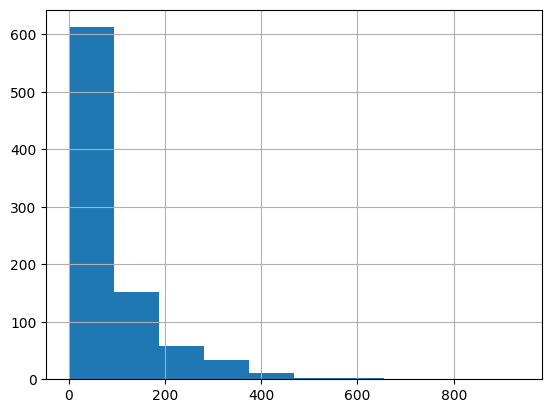

In [105]:
#8) Handle missing values in 'Revenue (Millions)' and 'Metascore
data['Revenue (Millions)'].hist()
median_revenue = data['Revenue (Millions)'].median()
data['Revenue (Millions)'] = data['Revenue (Millions)'].fillna(median_revenue)


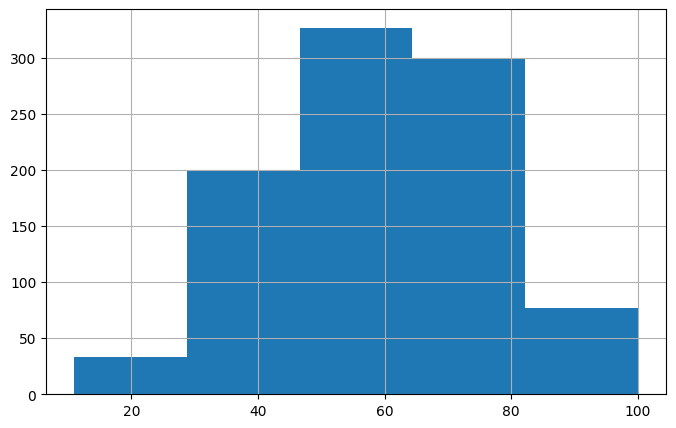

In [106]:
data['Metascore'].hist( bins=5, figsize=(8,5), grid=True)
mean_meta = data['Metascore'].mean()
data['Metascore'] = data['Metascore'].fillna(mean_meta)

In [107]:
data.isna().sum()

,0
Rank,0
Movie_Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [108]:
#9) Top 5 movies by Rating
top5_movies = data.sort_values(by='Rating', ascending=False).head()

print(top5_movies[['Movie_Title', 'Rating']])

          Movie_Title  Rating
54    The Dark Knight     9.0
80          Inception     8.8
117            Dangal     8.8
36       Interstellar     8.6
249  The Intouchables     8.6


In [110]:
#10) Movies with highest/lowest revenue
highest_rev = data.sort_values(by='Revenue (Millions)', ascending=False).head()
print(highes_rev[['Movie_Title', 'Revenue (Millions)']])
lowest_rev = data.sort_values(by='Revenue (Millions)', ascending= True).head()
print(lowest_rev[['Movie_Title', 'Revenue (Millions)']])

                                   Movie_Title  Revenue (Millions)
50  Star Wars: Episode VII - The Force Awakens              936.63
87                                      Avatar              760.51
85                              Jurassic World              652.18
76                                The Avengers              623.28
54                             The Dark Knight              533.32
          Movie_Title  Revenue (Millions)
231  A Kind of Murder                0.00
27         Dead Awake                0.01
68          Wakefield                0.01
961   Into the Forest                0.01
321          Lovesong                0.01


In [111]:
#11) Avg. rating by Director
data.groupby('Director')['Rating'].mean()

,Rating
Director,
Aamir Khan,8.50
Abdellatif Kechiche,7.80
Adam Leon,6.50
Adam McKay,7.00
Adam Shankman,6.30
...,...
Xavier Dolan,7.55
Yimou Zhang,6.10
Yorgos Lanthimos,7.20


In [112]:
#12) Movies per year
data.groupby('Year')['Movie_Title'].count()

,Movie_Title
Year,
2006,44
2007,53
2008,52
2009,51
2010,60
2011,63
2012,64
2013,91
2014,98


In [113]:
#13) Movies with rating > 8 & revenue > 100M
data[(data['Rating']>8) & (data['Revenue (Millions)']>100)]

,Rank,Movie_Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.000000
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.000000
36,37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.000000
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.000000
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.000000
67,68,Mad Max: Fury Road,"Action,Adventure,Sci-Fi",A woman rebels against a tyrannical ruler in p...,George Miller,"Tom Hardy, Charlize Theron, Nicholas Hoult, Zo...",2015,120,8.1,632842,153.63,90.000000
74,75,Zootopia,"Animation,Adventure,Comedy","In a city of anthropomorphic animals, a rookie...",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8.1,296853,341.26,78.000000
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.000000
77,78,Inglourious Basterds,"Adventure,Drama,War","In Nazi-occupied France during World War II, a...",Quentin Tarantino,"Brad Pitt, Diane Kruger, Eli Roth,Mélanie Laurent",2009,153,8.3,959065,120.52,69.000000
80,81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.000000


In [114]:
#14) Group by Director: avg Rating, Revenue

data.groupby('Director')[['Rating','Revenue (Millions)']].mean()

,Rating,Revenue (Millions)
Director,,
Aamir Khan,8.50,1.2000
Abdellatif Kechiche,7.80,2.2000
Adam Leon,6.50,47.9850
Adam McKay,7.00,109.5350
Adam Shankman,6.30,78.6650
...,...,...
Xavier Dolan,7.55,25.7375
Yimou Zhang,6.10,45.1300
Yorgos Lanthimos,7.20,4.4050


In [115]:
#15) Group by Year: count, avg Rating
result = data.groupby('Year').agg(
    movie_count=('Movie_Title', 'count'),
    avg_rating=('Rating', 'mean')
)

print(result)

      movie_count  avg_rating
Year                         
2006           44    7.125000
2007           53    7.133962
2008           52    6.784615
2009           51    6.960784
2010           60    6.826667
2011           63    6.838095
2012           64    6.925000
2013           91    6.812088
2014           98    6.837755
2015          127    6.602362
2016          297    6.436700


In [116]:
#16) Create a new column Profitability:
#a) Revenue divided by Duration
#b) Find top 10 most profitable movies
data['Profitablity']=data['Revenue (Millions)']/data['Runtime (Minutes)']
print(data['Profitablity'])
Prof = data.sort_values(by='Profitablity', ascending=False).head(10)
print(Prof[['Movie_Title', 'Profitablity']])

0      2.753140
1      1.019839
2      1.180513
3      2.502963
4      2.642439
         ...   
995    0.432297
996    0.186596
997    0.591939
998    0.515968
999    0.225747
Name: Profitablity, Length: 1000, dtype: float64
                                    Movie_Title  Profitablity
50   Star Wars: Episode VII - The Force Awakens      6.886985
85                               Jurassic World      5.259516
119                                Finding Dory      5.013299
87                                       Avatar      4.694506
76                                 The Avengers      4.358601
15                      The Secret Life of Pets      4.233448
688                                 Toy Story 3      4.028932
12                                    Rogue One      4.001278
174                                      Frozen      3.928824
797                             Despicable Me 2      3.755612


In [117]:
#17) Create a column that categorizes movies by rating:
#a) Rating < 6: Poor
#b) 6 ≤ Rating < 7.5: Average
#c) Rating ≥ 7.5: Excellent

def rating_category(r):
  if r<6:
    return 'Poor'
  elif 6 <= r < 7.5:
    return 'Average'
  else:
    return 'Excellent'
data['Rating_Category']=data['Rating'].apply(rating_category)
print(data['Rating_Category'])

0      Excellent
1        Average
2        Average
3        Average
4        Average
         ...    
995      Average
996         Poor
997      Average
998         Poor
999         Poor
Name: Rating_Category, Length: 1000, dtype: object


In [118]:
#18) Create a custom function to score movies based on:
#i) Apply row['Rating'] * 10 + row['Revenue (Millions)'] as High score
#Apply a function to dataset to assign the score

def score_movies(r):
  return r['Rating'] * 10 + r['Revenue (Millions)']
data['High_Score'] = data.apply(score_movies, axis=1)
print(data['High_Score'])


0      414.130
1      196.460
2      211.120
3      342.320
4      387.020
        ...   
995    109.985
996     72.540
997    120.010
998    103.985
999     72.640
Name: High_Score, Length: 1000, dtype: float64
